In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:

# Load the dataset
file_path = "datasetupdated.csv"  
df = pd.read_csv(file_path)


In [3]:

# Select required columns
df["ds"] = pd.to_datetime(df["YEAR"], format="%Y")
df["y"] = df["CasesReported"]
df["exog"] = df["Total Cases for Investigation (Col.7=Col.4+ Col.5+ Col.6)"]



In [4]:

# Train-Test Split
train_size = int(len(df) * 0.9)  # Use 90% for training
train_y, test_y = df["y"][:train_size], df["y"][train_size:]
train_exog, test_exog = df["exog"][:train_size], df["exog"][train_size:]


In [5]:

# Scale the exogenous variable
scaler = MinMaxScaler()
train_exog_scaled = scaler.fit_transform(np.array(train_exog).reshape(-1, 1))
test_exog_scaled = scaler.transform(np.array(test_exog).reshape(-1, 1))


In [6]:

# -------------------- ARIMAX Model --------------------
arimax_order = (3, 1, 1)  # Adjusted from (3,2,1)
arimax_model = ARIMA(train_y, exog=train_exog_scaled, order=arimax_order)
arimax_fit = arimax_model.fit()


In [7]:

# Future Exogenous Values (Scaled)
future_exog = np.array([231.0, 242.55, 254.1, 265.65, 277.2]).reshape(-1, 1)
future_exog_scaled = scaler.transform(future_exog)


In [8]:

# Forecasting
arimax_forecast = arimax_fit.get_forecast(steps=5, exog=future_exog_scaled)
arimax_forecast_values = arimax_forecast.predicted_mean


In [9]:

# -------------------- Evaluation --------------------
test_forecast = arimax_fit.forecast(steps=len(test_y), exog=test_exog_scaled)
mae_arimax = mean_absolute_error(test_y, test_forecast)
rmse_arimax = np.sqrt(mean_squared_error(test_y, test_forecast))

print(f"ARIMAX MAE: {mae_arimax:.2f}, RMSE: {rmse_arimax:.2f}")


ARIMAX MAE: 260.53, RMSE: 453.50


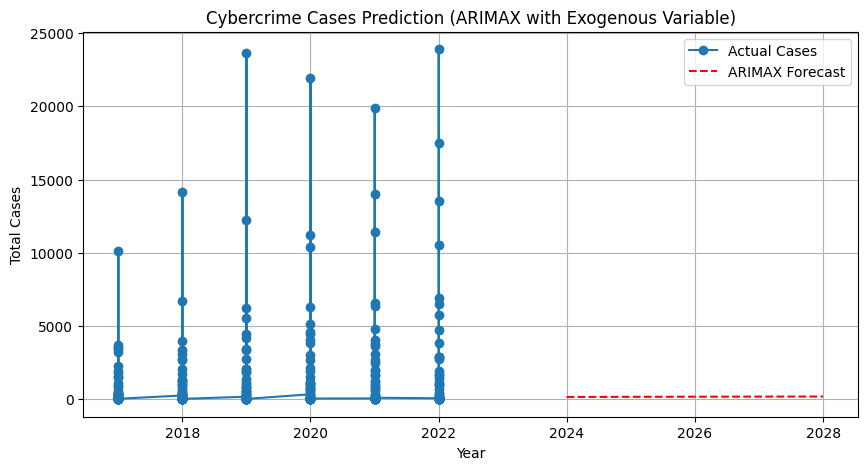

In [10]:

# -------------------- Plot --------------------
plt.figure(figsize=(10, 5))
plt.plot(df["ds"], df["y"], 'o-', label="Actual Cases")
plt.plot(pd.date_range(start=df["ds"].max() + pd.DateOffset(years=1), periods=5, freq="YE"), 
         arimax_forecast_values, 'r--', label="ARIMAX Forecast")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.title("Cybercrime Cases Prediction (ARIMAX with Exogenous Variable)")
plt.legend()
plt.grid(True)
plt.show()